# **Analisis Dampak Banjir di Aceh**

##### <span style="color:green;">Setelah melakukan analisis penyebab banjir di Aceh seperti Curah Hujan, Deforestasi, Kemiringan lahan, maupun kepadatan penduduk, kita akan langsung menganalisis dampak dari banjir di Aceh. Mulai dari korban yang meninggal, hilang, maupun kerugian ekonomi yang dialami Aceh karena infrastruktur yang rusak.</span>


## Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [4]:
df_raw = pd.read_csv("Data Korban Banjir (databoks, dll)/Data_Korban_Banjir_Meninggal.csv")
df_raw.head()

,provinsi,kabupaten_kota,indikator,nilai,satuan,tanggal,sumber
0,Aceh,Aceh Utara,Korban Meninggal,166,orang,2025-12-18,Katadata Insight Center; BNPB
1,Aceh,Aceh Tamiang,Korban Meninggal,85,orang,2025-12-18,Katadata Insight Center; BNPB
2,Aceh,Aceh Timur,Korban Meninggal,53,orang,2025-12-18,Katadata Insight Center; BNPB
3,Aceh,Bireuen,Korban Meninggal,33,orang,2025-12-18,Katadata Insight Center; BNPB
4,Aceh,Bener Meriah,Korban Meninggal,30,orang,2025-12-18,Katadata Insight Center; BNPB


In [5]:
df_korban = df_raw[df_raw["provinsi"] == "Aceh"].copy()

df_korban = df_korban.rename(columns={
    "nilai": "korban_meninggal"
})

df_korban = df_korban[[
    "kabupaten_kota",
    "korban_meninggal",
]]

df_korban.sort_values("korban_meninggal", ascending=True).head(11)



,kabupaten_kota,korban_meninggal
10,Kota Lhokseumawe,4
8,Gayo Lues,5
9,Kota Langsa,5
7,Aceh Tenggara,13
6,Aceh Tengah,24
5,Pidie Jaya,29
4,Bener Meriah,30
3,Bireuen,33
2,Aceh Timur,53
1,Aceh Tamiang,85


## Distribusi Korban (lihat skewness)

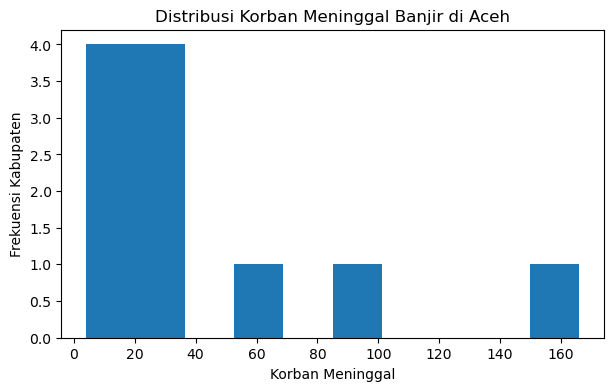

In [6]:
plt.figure(figsize=(7,4))
plt.hist(df_korban["korban_meninggal"], bins=10)
plt.xlabel("Korban Meninggal")
plt.ylabel("Frekuensi Kabupaten")
plt.title("Distribusi Korban Meninggal Banjir di Aceh")
plt.show()

##### <span style="color:red;">Karena ini data untuk daerah-daerah di Aceh saja (tidak termasuk bagian Sumatera lainnya), distribusinya skewed ke kanan (mayoritas daerah memiliki korban meninggal yang tidak terlalu banyak). Ini berarti, bencana ini ekstrem terlokalisasi (daerah-daerah tertentu memiliki korban yang banyak), bukan merata. Ini bisa terjadi karena kurangnya akurasi dari data, dan juga tidak semua daerah di sumatera ikut dianalisis.</span>


## Outlier Detection

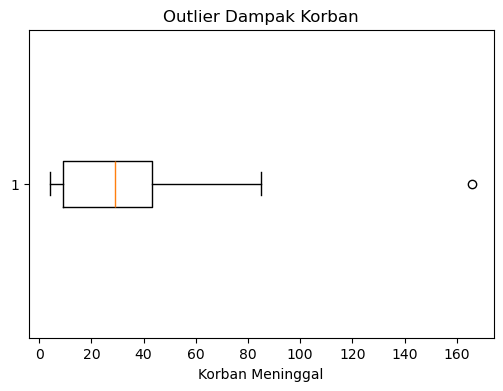

In [7]:
plt.figure(figsize=(6,4))
plt.boxplot(df_korban["korban_meninggal"], vert=False)
plt.xlabel("Korban Meninggal")
plt.title("Outlier Dampak Korban")
plt.show()

## Kategori Dampak (persiapan data untuk ML)

<Axes: xlabel='kategori_dampak'>

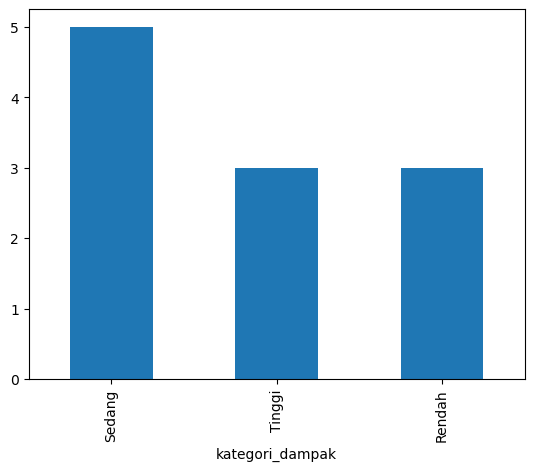

In [8]:
def kategori_dampak(x):
    if x == 0:
        return "Tidak Ada Korban"
    elif x <= 10:
        return "Rendah"
    elif x <= 50:
        return "Sedang"
    else:
        return "Tinggi"

df_korban["kategori_dampak"] = df_korban["korban_meninggal"].apply(kategori_dampak)
df_korban["kategori_dampak"].value_counts().plot(kind="bar")



# **Luas Wilayah Aceh yang Terdampak Banjir menurut Dinas Pertanian dan Perkebunan Aceh**
https://distanbun.acehprov.go.id/berita/kategori/banjir/lahan-sawah-aceh-terdampak-banjir-89582-ha-kerugian-ditaksir-tembus-rp-1-triliun#:~:text=rp%201%20triliun-,Lahan%20Sawah%20Aceh%20Terdampak%20Banjir%2089.582%20Ha,Ditaksir%20Tembus%20Rp%201%20Triliun

In [9]:
data_pertanian = {
    "provinsi": ["Aceh"],
    "luas_sawah_terdampak_ha": [89582],
    "luas_puso_ha": [27065],
    "luas_bisa_ditanami_ha": [62517],
    "total_baku_sawah_ha": [202811],
    "estimasi_kerugian_rp": [1_164_000_000_000]
}

df_pertanian = pd.DataFrame(data_pertanian)
df_pertanian

,provinsi,luas_sawah_terdampak_ha,luas_puso_ha,luas_bisa_ditanami_ha,total_baku_sawah_ha,estimasi_kerugian_rp
0,Aceh,89582,27065,62517,202811,1164000000000


## Feature Engineering

In [10]:
df_pertanian["rasio_terdampak"] = (
    df_pertanian["luas_sawah_terdampak_ha"] /
    df_pertanian["total_baku_sawah_ha"]
)

df_pertanian["rasio_puso"] = (
    df_pertanian["luas_puso_ha"] /
    df_pertanian["luas_sawah_terdampak_ha"]
)

df_pertanian


,provinsi,luas_sawah_terdampak_ha,luas_puso_ha,luas_bisa_ditanami_ha,total_baku_sawah_ha,estimasi_kerugian_rp,rasio_terdampak,rasio_puso
0,Aceh,89582,27065,62517,202811,1164000000000,0.441702,0.302125


##### <span style="color:red;">Ini berarti kurang lebih 44% sawah di Aceh terdampak banjir, dan sekitar 30% dari sawah Aceh tidak bisa ditanami lagi (puso total)</span>


# **Kerugian Ekonomi Aceh akibat bencana ini**

In [11]:
df_kerugian = pd.read_csv("Kerugian Ekonomi Aceh-Sumatera Pasca Banjir/Kerugian_Ekonomi.csv", engine="python")
df_kerugian.head(15)

,Kategori,Detail,Provinsi_Luas,Estimasi_Kerugian_Rp,Satuan,Sumber
0,Rumah Warga,Rumah rusak/terendam,Aceh,6.280000e+12,unit,Kontan / KI Rimau
1,Pertanian,Sawah,Aceh,1.164000e+12,ha,AcehProv
2,Pertanian,Jagung,Aceh,NaN,ha,AcehProv
3,Pertanian,"Hortikultura (cabai, bawang, kentang)",Aceh,NaN,ha,AcehProv
4,Perkebunan,"Kakao, Kelapa, Kopi",Aceh,NaN,ha,AcehProv
5,Kerugian Nasional,"Luas wilayah terdampak Aceh, Sumut dan Sumbar",Aceh-Sumut-Sumbar,6.867000e+13,Rp,Kompas.com / Celios
6,Kerugian Langsung Daerah,"Aceh, Sumut, Sumbar",Aceh-Sumut-Sumbar,2.200000e+12,Rp,NU Online / Celios
7,Kerugian Per Provinsi,Aceh,Aceh,2.040000e+12,Rp,Kompas.com / Celios
8,Kerugian Per Provinsi,Sumatera Utara,Sumut,2.070000e+12,Rp,Kompas.com / Celios
9,Kerugian Per Provinsi,Sumatera Barat,Sumbar,2.010000e+12,Rp,Kompas.com / Celios


## Data berbasis Ekonomi

In [12]:
df_ekonomi = df_kerugian[df_kerugian["Estimasi_Kerugian_Rp"].notna()].copy()
df_ekonomi.head(20)

,Kategori,Detail,Provinsi_Luas,Estimasi_Kerugian_Rp,Satuan,Sumber
0,Rumah Warga,Rumah rusak/terendam,Aceh,6.280000e+12,unit,Kontan / KI Rimau
1,Pertanian,Sawah,Aceh,1.164000e+12,ha,AcehProv
5,Kerugian Nasional,"Luas wilayah terdampak Aceh, Sumut dan Sumbar",Aceh-Sumut-Sumbar,6.867000e+13,Rp,Kompas.com / Celios
6,Kerugian Langsung Daerah,"Aceh, Sumut, Sumbar",Aceh-Sumut-Sumbar,2.200000e+12,Rp,NU Online / Celios
7,Kerugian Per Provinsi,Aceh,Aceh,2.040000e+12,Rp,Kompas.com / Celios
8,Kerugian Per Provinsi,Sumatera Utara,Sumut,2.070000e+12,Rp,Kompas.com / Celios
9,Kerugian Per Provinsi,Sumatera Barat,Sumbar,2.010000e+12,Rp,Kompas.com / Celios
10,Kerugian Per Provinsi,Jambi,Jambi,2.000000e+12,Rp,Kompas.com / Celios
11,Kerugian Per Provinsi,Riau,Riau,2.000000e+12,Rp,Kompas.com / Celios
12,Kerugian Per Provinsi,Sumatera Selatan,Sumatera Selatan,2.000000e+12,Rp,Kompas.com / Celios


## Data berbasis Luas

In [13]:
df_luas = df_kerugian[
    (df_kerugian["Estimasi_Kerugian_Rp"].isna()) &
    (df_kerugian["Satuan"] == "ha")
].copy()

df_luas.head()


,Kategori,Detail,Provinsi_Luas,Estimasi_Kerugian_Rp,Satuan,Sumber
2,Pertanian,Jagung,Aceh,NaN,ha,AcehProv
3,Pertanian,"Hortikultura (cabai, bawang, kentang)",Aceh,NaN,ha,AcehProv
4,Perkebunan,"Kakao, Kelapa, Kopi",Aceh,NaN,ha,AcehProv


## Visualisasi Kerugian Ekonomi

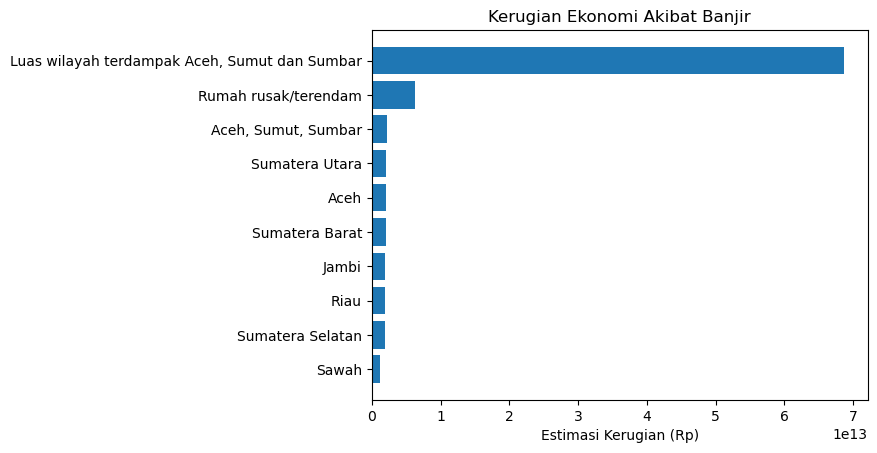

In [14]:
df_ekonomi = df_ekonomi.sort_values("Estimasi_Kerugian_Rp", ascending=False)

plt.figure()
plt.barh(df_ekonomi["Detail"], df_ekonomi["Estimasi_Kerugian_Rp"])
plt.xlabel("Estimasi Kerugian (Rp)")
plt.title("Kerugian Ekonomi Akibat Banjir")
plt.gca().invert_yaxis()
plt.show()